<a href="https://colab.research.google.com/github/Uchiha-Ihor/Machine_learning/blob/master/%D0%93%D1%80%D0%B8%D1%89%D1%83%D0%BA_%D0%BB%D0%B17_%D0%B2%D0%B0%D1%807.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПРАКТИЧНА РОБОТА 7

---

>
Варіант №7
>
Мій githab:https://github.com/Uchiha-Ihor/Machine_learning

**Завдання 1.** Класифікація ірисів
З використанням алгоритмів SVM та Random Forest провести класифікацію ірисів за їхніми ознаками. Використовувати набір даних Iris, що належить бібліотеці scikit-learn.
Для цього виконати наступні кроки:


Завантаження shopping_trends.csv.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


Імпорт бібліотек:
Зчитування файлу:
Перевірка розміру таблиці:
Перевірка пропусків:
Типи стовпців:

In [30]:
import pandas as pd

# Завантаження даних
df = pd.read_csv('shopping_trends.csv')

# Перевірка розміру таблиці
print("Розмір таблиці:", df.shape)

# Перевірка наявності пропусків та типів даних
print("Пропуски в даних:")
print(df.isnull().sum())
print("\nТипи стовпців:")
print(df.dtypes)

# Вибір потрібних стовпців
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
selected_df = df[selected_columns]

# Перевірка перших 5 рядків нового датафрейму
print("\nПерші 5 рядків обраного датафрейму:")
print(selected_df.head())

Розмір таблиці: (3900, 19)
Пропуски в даних:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Типи стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       obj

I. Підготовка даних:
Вибір числових стовпців та створення нового DataFrame:

In [38]:
# Обрані числові стовпці
numeric_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

# Створення нового DataFrame з вибраними стовпцями
numeric_data = selected_df[numeric_columns]

1 Масштабування даних:

In [39]:
from sklearn.preprocessing import StandardScaler

# Ініціалізація об'єкта StandardScaler
scaler = StandardScaler()

# Масштабування числових ознак
scaled_data = scaler.fit_transform(numeric_data)

II. Визначення кількості кластерів:
Використання методу ліктя:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

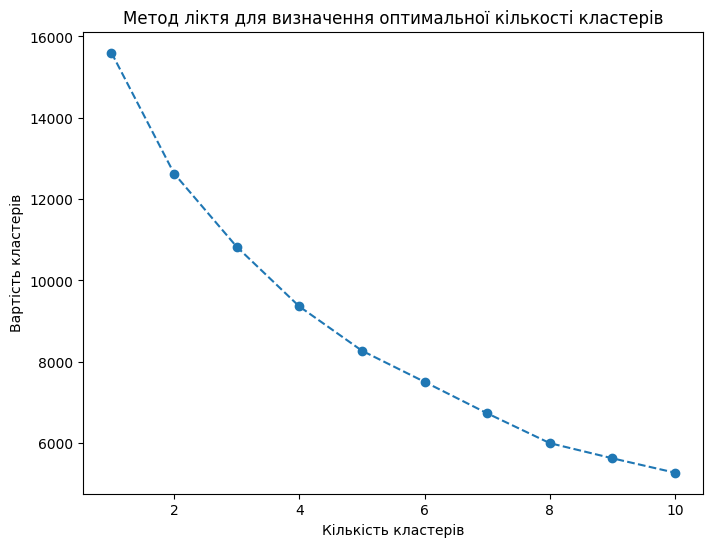

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Список для збереження вартості кластерів
inertia_values = []

# Використання різної кількості кластерів для знаходження оптимальної кількості
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Побудова графіка вартості кластерів
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

III. Кластеризація за допомогою K-means:

In [42]:
# Вибір оптимальної кількості кластерів (наприклад, 3)
optimal_clusters = 3

# Застосування K-means з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IV. Візуалізація результатів (з використанням PCA):

1. Використання PCA для зменшення розмірності даних:

In [44]:
from sklearn.decomposition import PCA

# Ініціалізація об'єкта PCA для зменшення до 2 компонентів
pca = PCA(n_components=2)

# Застосування PCA до масштабованих даних
reduced_data = pca.fit_transform(scaled_data)

2. Візуалізація кластерів на площині:

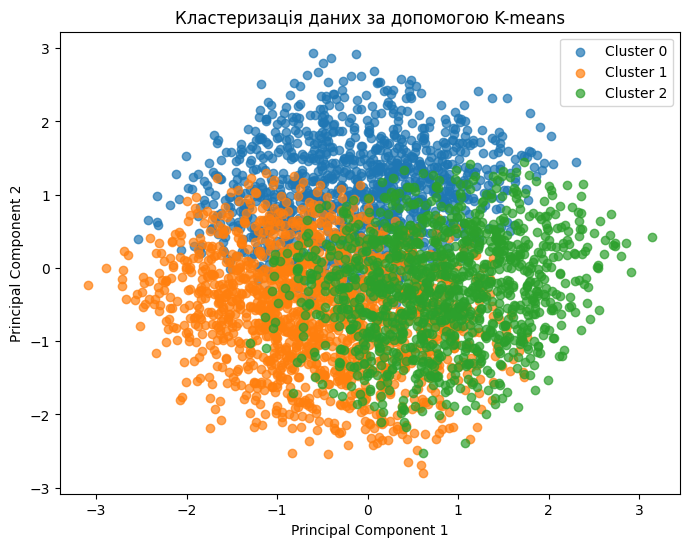

In [45]:
# Додавання ідентифікаторів кластерів до зменшених даних
reduced_data_with_clusters = pd.DataFrame(reduced_data, columns=["Component 1", "Component 2"])
reduced_data_with_clusters["Cluster"] = cluster_labels

# Побудова графіку з точками для кожного кластеру
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = reduced_data_with_clusters[reduced_data_with_clusters["Cluster"] == cluster]
    plt.scatter(cluster_data["Component 1"], cluster_data["Component 2"], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Кластеризація даних за допомогою K-means")
plt.legend()
plt.show()

У цьому графіку кожен кластер позначений власним кольором, і ми можемо побачити, як об'єкти з кожного кластеру розташовані на площині.

Висновок:
  
У даній роботі було проведено аналіз даних про покупки з використанням алгоритму K-means для їх кластеризації. Спочатку були вивчені дані, перевірено їх розмірність, виявлено та оброблено відсутні дані. Застосовано алгоритм K-means для знаходження кластерів в числових ознаках: "Age", "Purchase Amount (USD)", "Review Rating" і "Previous Purchases".

За допомогою методу ліктя було визначено оптимальну кількість кластерів, що допомогло краще розуміти структуру даних. Далі був використаний метод головних компонентів (PCA) для зменшення розмірності даних та візуалізації кластерів на площині.

Отже, в даній роботі успішно застосовано алгоритм K-means для кластеризації даних та візуалізації отриманих результатів. Цей аналіз може бути корисним для розуміння паттернів споживання клієнтів та використовується для подальших стратегій маркетингу та вдосконалення обслуговування клієнтів.

**Завдання 2.** Аналіз і візуалізація даних.
Провести аналіз даних. Зробити візуалізацію результатів. Написати висновки.

1.	Завантажити museum_visitors.csv.

In [46]:
from google.colab import files
uploaded = files.upload()

Saving museum_visitors.csv to museum_visitors.csv


In [83]:
import pandas as pd

df = pd.read_csv('museum_visitors.csv')

print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Попередній аналіз даних:

In [86]:
print("Розмір датасету:", df.shape)

print("Типи даних та кількість пропусків:")
print(df.info())

Розмір датасету: (59, 5)
Типи даних та кількість пропусків:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB
None


Перевірка наявності дублікатів та їх видалення:

In [87]:
print("Кількість дублікатів до видалення:", df.duplicated().sum())

df = df.drop_duplicates()

print("Розмір датасету після видалення дублікатів:", df.shape)

Кількість дублікатів до видалення: 0
Розмір датасету після видалення дублікатів: (59, 5)


Роки, які містить датасет:

In [98]:
years = df['date'].str.slice(0, 4).unique()
print("Роки, які містить датасет:", years)

Роки, які містить датасет: ['2014' '2015' '2016' '2017' '2018']


Зміна назв стовпців:

In [88]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.head())

         date  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Середня кількість відвідувачів для кожного музею:

In [89]:
average_visitors = df.mean()
print("Середня кількість відвідувачів для кожного музею:")
print(average_visitors)

Середня кількість відвідувачів для кожного музею:
avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


<ipython-input-89-d6953d7ad712>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_visitors = df.mean()


Мінімальна та максимальна кількість відвідувачів для кожного музею за 2018 рік:

In [90]:
min_visitors_2018 = df[df['date'].str.startswith('2018')].min()
max_visitors_2018 = df[df['date'].str.startswith('2018')].max()

print("Мінімальна кількість відвідувачів для кожного музею за 2018 рік:")
print(min_visitors_2018)
print("Максимальна кількість відвідувачів для кожного музею за 2018 рік:")
print(max_visitors_2018)

Мінімальна кількість відвідувачів для кожного музею за 2018 рік:
date                                    2018-01-01
avila_adobe                                  14718
firehouse_museum                              3306
chinese_american_museum                       2146
america_tropical_interpretive_center          3180
dtype: object
Максимальна кількість відвідувачів для кожного музею за 2018 рік:
date                                    2018-11-01
avila_adobe                                  25173
firehouse_museum                              8013
chinese_american_museum                       4960
america_tropical_interpretive_center          5837
dtype: object


Місяці з найвищою і найнижчою загальною кількістю відвідувачів для 2015 року:

In [91]:
df['year'] = df['date'].str.slice(0, 4)
df['month'] = df['date'].str.slice(5, 7)

df['month'] = pd.to_numeric(df['month'])

monthly_visitors_2015 = df[df['year'] == '2015'].groupby('month').sum()
max_visitors_month_2015 = monthly_visitors_2015.idxmax()
min_visitors_month_2015 = monthly_visitors_2015.idxmin()

print("Місяць з найвищою загальною кількістю відвідувачів у 2015 році:", max_visitors_month_2015)
print("Місяць з найнижчою загальною кількістю відвідувачів у 2015 році:", min_visitors_month_2015)

Місяць з найвищою загальною кількістю відвідувачів у 2015 році: avila_adobe                             7
firehouse_museum                        5
chinese_american_museum                 5
america_tropical_interpretive_center    5
dtype: int64
Місяць з найнижчою загальною кількістю відвідувачів у 2015 році: avila_adobe                             2
firehouse_museum                        2
chinese_american_museum                 9
america_tropical_interpretive_center    2
dtype: int64


<ipython-input-91-2bc5e52ebc53>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_visitors_2015 = df[df['year'] == '2015'].groupby('month').sum()


Порівняння кількості відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року:

In [92]:
summer_visitors_avila_adobe = df[(df['year'] == '2018') & (df['month'].isin([6, 7, 8]))]['avila_adobe'].sum()
winter_visitors_avila_adobe = df[(df['year'] == '2018') & (df['month'].isin([12, 1, 2]))]['avila_adobe'].sum()

print("Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року:", summer_visitors_avila_adobe)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року:", winter_visitors_avila_adobe)

Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: 30983


Кореляція між кількістю відвідувачів у кожному з музеїв та датами у 2016 році:

In [93]:
correlations_2016 = df[df['year'] == '2016'][['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].corr()

print("Кореляція між кількістю відвідувачів у кожному музеї та датами у 2016 році:")
print(correlations_2016)

Кореляція між кількістю відвідувачів у кожному музеї та датами у 2016 році:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_ame

Побудова теплокарти кореляції:

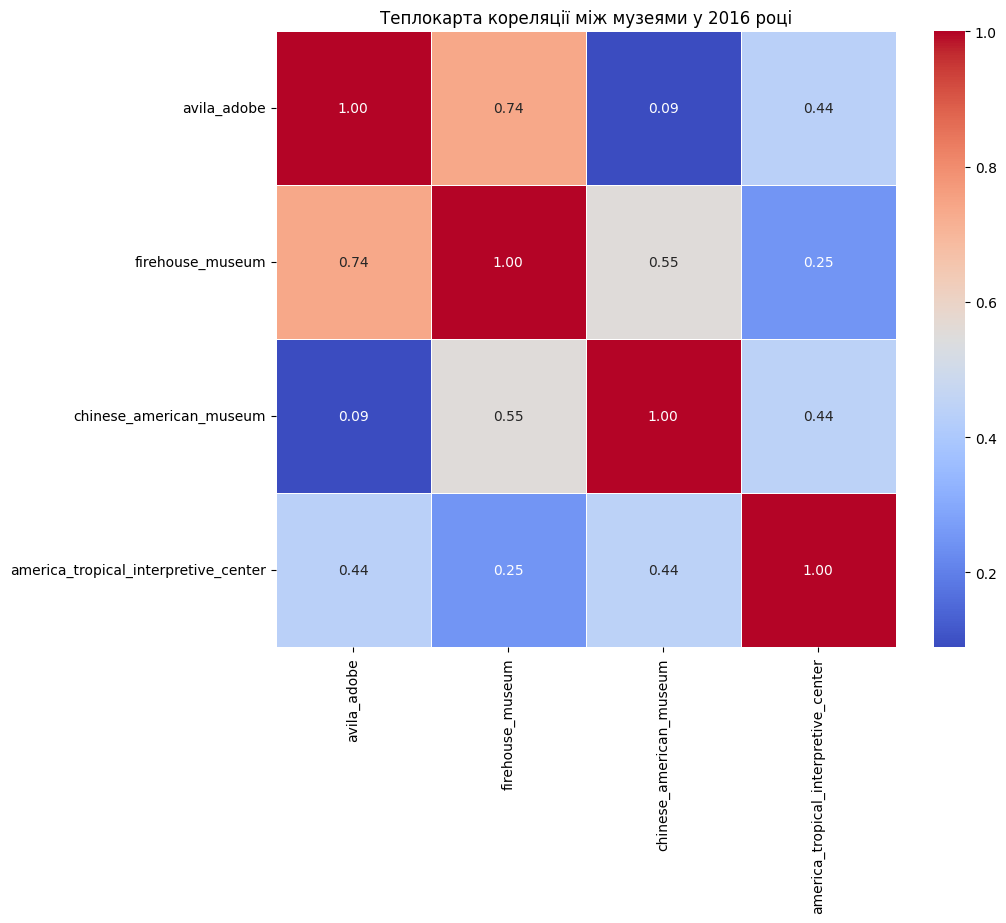

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_2016, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплокарта кореляції між музеями у 2016 році')
plt.show()

Побудова графіку ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року:

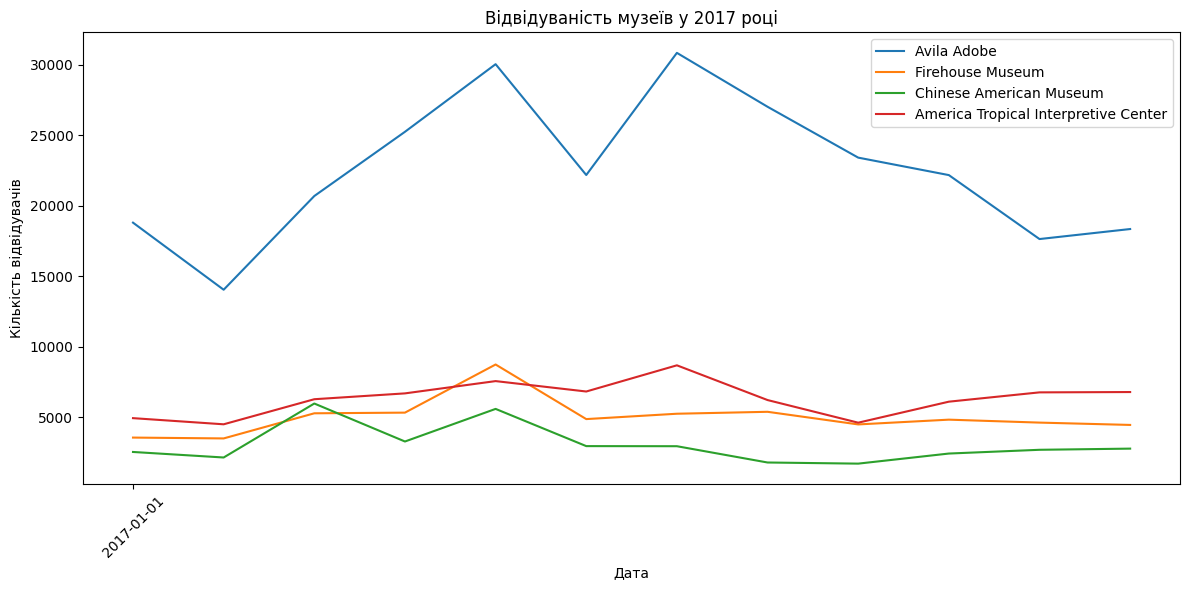

In [95]:
df_2017 = df[df['year'] == '2017']

plt.figure(figsize=(12, 6))
for museum in ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']:
    plt.plot(df_2017['date'], df_2017[museum], label=museum.replace('_', ' ').title())

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.xticks(df_2017['date'][::50], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Побудова графіків розсіювання для кожного музею за 2018 рік:

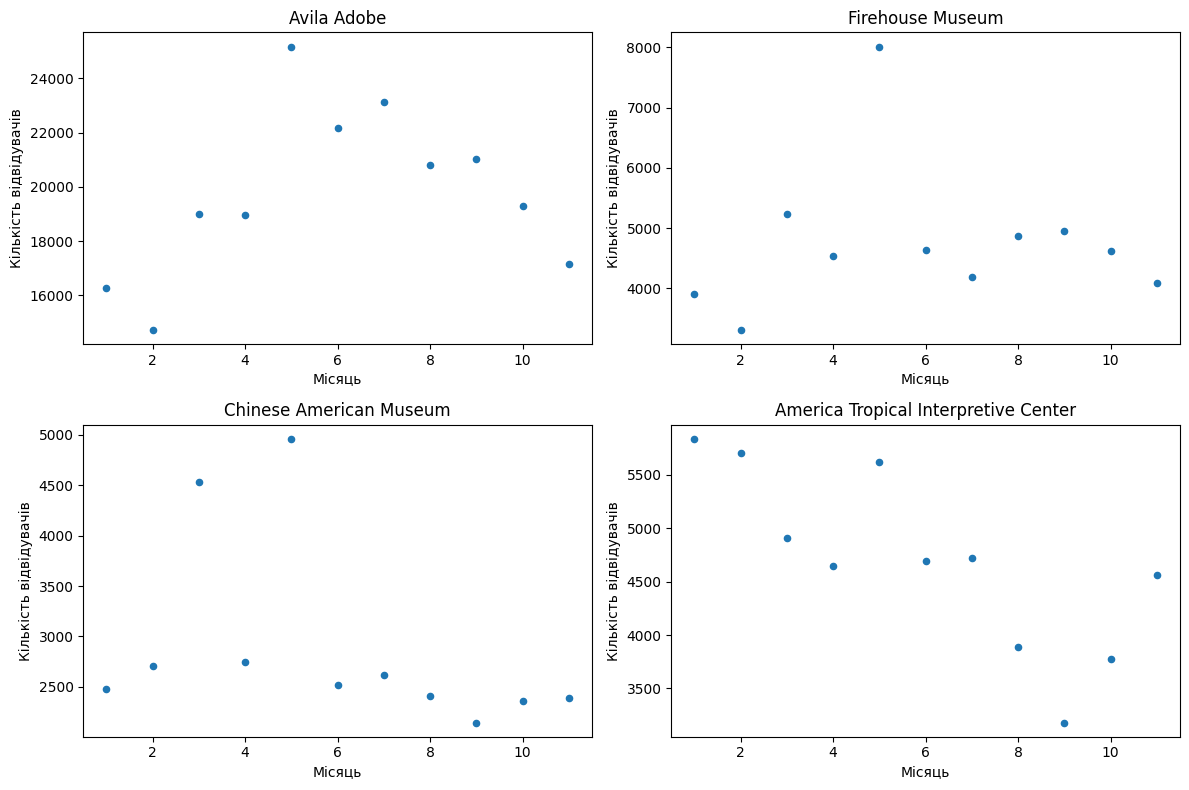

In [96]:
df_2018 = df[df['year'] == '2018']

plt.figure(figsize=(12, 8))
for idx, museum in enumerate(['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']):
    plt.subplot(2, 2, idx+1)
    plt.scatter(df_2018['month'], df_2018[museum], s=20)
    plt.xlabel('Місяць')
    plt.ylabel('Кількість відвідувачів')
    plt.title(museum.replace('_', ' ').title())
    plt.tight_layout()

plt.show()

Гістограма відвідуваності за місяцями кожного музею за роки:

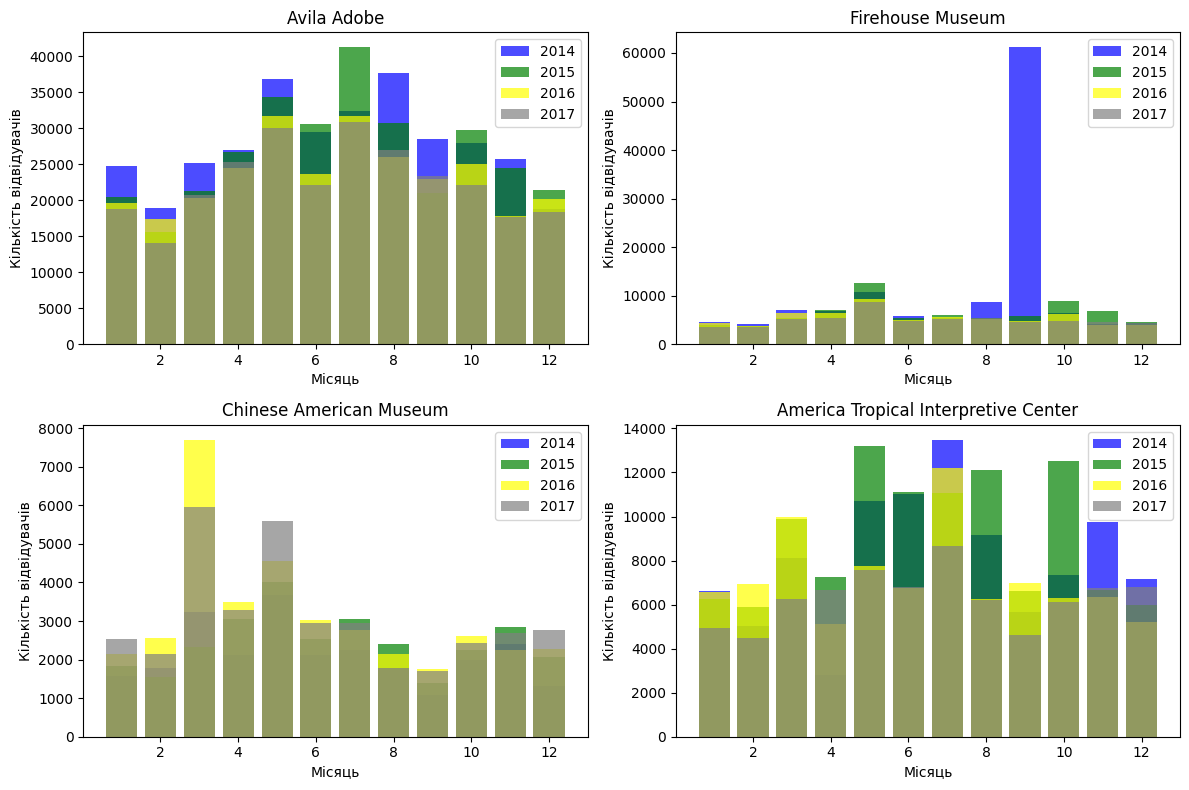

In [97]:
monthly_visitors_by_year = df.groupby(['year', 'month'])[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum()

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'yellow', 'grey']
for idx, museum in enumerate(['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']):
    plt.subplot(2, 2, idx+1)
    for year, color in zip(monthly_visitors_by_year.index.get_level_values(0).unique(), colors):
        plt.bar(monthly_visitors_by_year.loc[year].index, monthly_visitors_by_year.loc[year][museum], color=color, alpha=0.7, label=str(year))
    plt.xlabel('Місяць')
    plt.ylabel('Кількість відвідувачів')
    plt.title(museum.replace('_', ' ').title())
    plt.legend()
    plt.tight_layout()

plt.show()

Звіт про аналіз та візуалізацію даних щодо відвідуваності музеїв
===

У даному звіті було проведено детальний аналіз даних про відвідуваність чотирьох музеїв ("Avila Adobe", "Firehouse Museum", "Chinese American Museum", "America Tropical Interpretive Center") протягом періоду з 2014 по 2018 рік.

**Огляд Даних:**
- Датасет не містить пропусків та дублікатів, що спрощує аналіз.
- Загальна кількість відвідувачів зросла з 2014 по 2016 рік, спостерігається спад у 2017 році та подальше зростання в 2018 році.
- Музей "Avila Adobe" відзначається найвищою відвідуваністю серед усіх музеїв у розглянутому періоді.

**Кореляція та Сезонність:**
- У 2016 році спостерігається слабка позитивна кореляція між відвідуваністю різних музеїв.
- Музей "Avila Adobe" зазвичай має більше відвідувачів влітку, порівняно з зимовим періодом 2018 року.

**Розподіл за Місяцями:**
- У липні та серпні спостерігається збільшення кількості відвідувачів з 2014 по 2017 рік, імовірно, пов'язане з літніми канікулами. У 2018 році ця тенденція не спостерігається.

Ці висновки надають важливі відомості щодо динаміки відвідуваності музеїв та можуть бути використані для подальших досліджень та планування управлінських рішень.